In [1]:
import sys
import os

repo_root = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))
sys.path.append(repo_root)

print(repo_root)

/home/jackyeung99/classes/class_financial-econometrics


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math 
import numpy as np
import pandas as pd
import random


In [3]:
plt.style.use("../styler.mplstyle") 

## Question 1

In [4]:


def spectral_representation(lambdas, alpha, beta, sigma2, N=1000, rng=None):
    """
    Approximate spectral representation by generating random weights at N frequencies.
    """
    if rng is None:
        rng = np.random.default_rng()


    delta = 2*math.pi / N 

    vals = []
    for lam in lambdas:
        z = np.exp(1j * lam)

        alpha_poly = 1 - sum(a * (z**k) for k, a in enumerate(alpha, start=1))
        beta_poly  = 1 + sum(b * (z**k) for k, b in enumerate(beta, start=1))
        H = beta_poly / alpha_poly

    
        f = sigma2 * np.abs(H)**2

        xi = rng.normal() + 1j * rng.normal()
        dZ = np.sqrt(f * delta / 2) * xi

        vals.append(dZ)

    return vals

def spectral_time_series(dZ, T=1024):
    
    dZ[T//2+1:] = np.conj(dZ[1:T//2][::-1])
    x = np.fft.ifft(dZ).real * T  
    return x



In [5]:
def get_spectral_density(lambdas, alpha, beta, sigma, N=1000):

    delta = 2*math.pi / N  # step size in frequency

    densities = []

    for lam in lambdas:
        z = np.exp(1j * lam)  
    
        alpha_poly = 1 - sum(a * (z**k) for k, a in enumerate(alpha, start=1))
        beta_poly = 1 + sum(b * (z**k) for k, b in enumerate(beta, start=1))

        # Spectral density
        f = sigma * (np.abs(beta_poly)**2) / (np.abs(alpha_poly)**2) * delta

        densities.append(f)

    return densities

    

In [6]:
def plot_spectral_time(p, q, Ts, N, sigma2, OUTDIR):
    phi  = np.random.uniform(0, 1, p)
    theta = np.random.uniform(0, 1, q)

    lambdas = np.linspace(-math.pi, math.pi, N, endpoint=False)

    fig, axes = plt.subplots(1, len(Ts), figsize=(5*len(Ts), 4), sharey=True)

    if len(Ts) == 1:
        axes = [axes]  

    for i, T in enumerate(Ts):
        # Autocovariance in spectral domain
        y = get_spectral_density(lambdas, phi, theta, sigma2)

        axes[i].plot(lambdas, y)
        axes[i].set_title(f"T = {T}")
        axes[i].set_xlabel(r"Frequency ($\lambda$)")
        if i == 0:
            axes[i].set_ylabel("Autocovariance")

        # Unit circle tick labels
        ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
        tick_labels = [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", 
                       r"$\frac{\pi}{2}$", r"$\pi$"]
        axes[i].set_xticks(ticks)
        axes[i].set_xticklabels(tick_labels)

    plt.tight_layout()
    fname = os.path.join(OUTDIR, f"arma_{p}_{q}.png")
    plt.savefig(fname, dpi=150, bbox_inches="tight")
    plt.show()
    



In [7]:
PARAM = [(1,0), (4,0), (0,1), (0,4), (1,1)]
Ts = [100, 1000, 10000]
SIGMA2 = 1.0
MAX_LAG = 10

In [8]:
OUTDIR = "../Figures/Assignment02"
os.makedirs(OUTDIR, exist_ok=True)

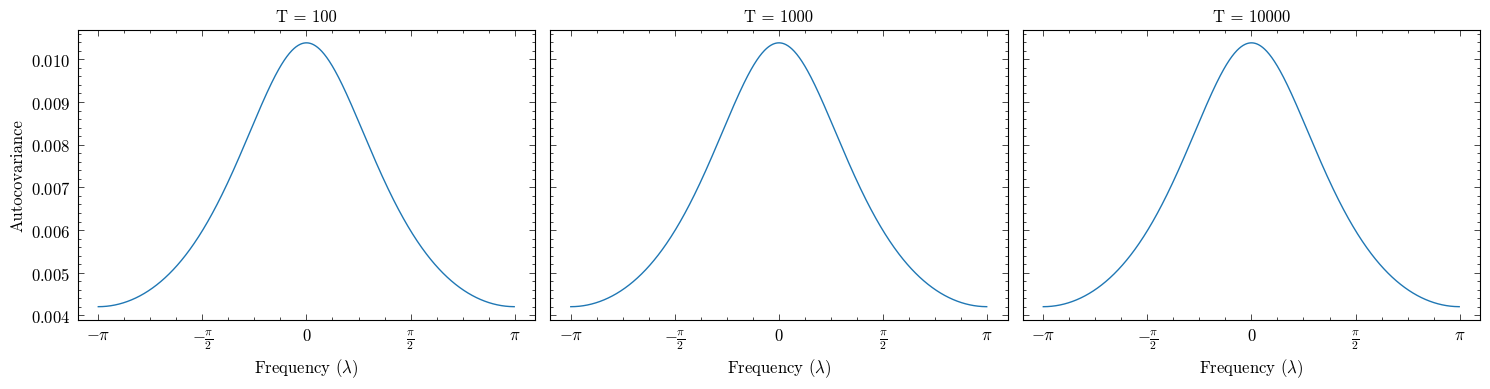

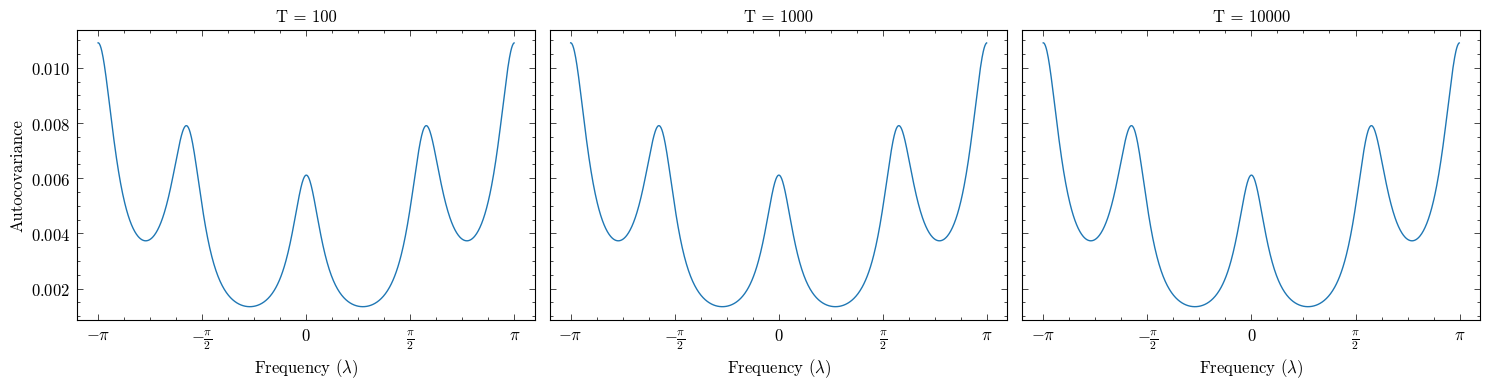

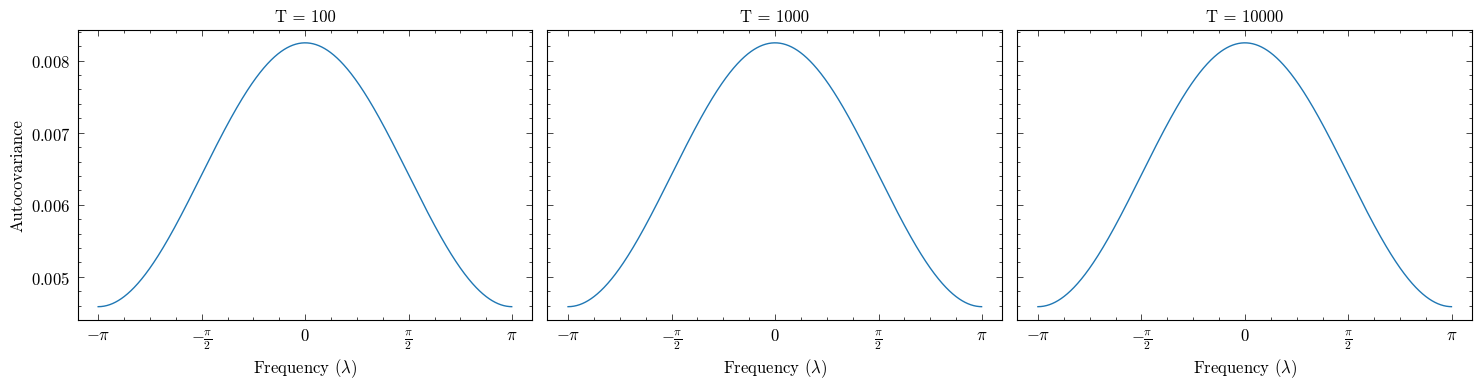

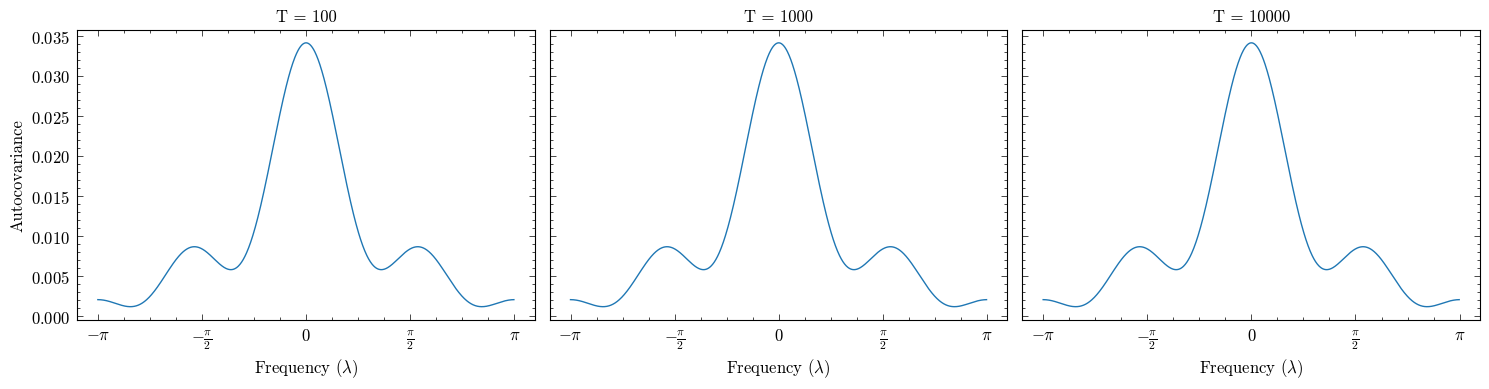

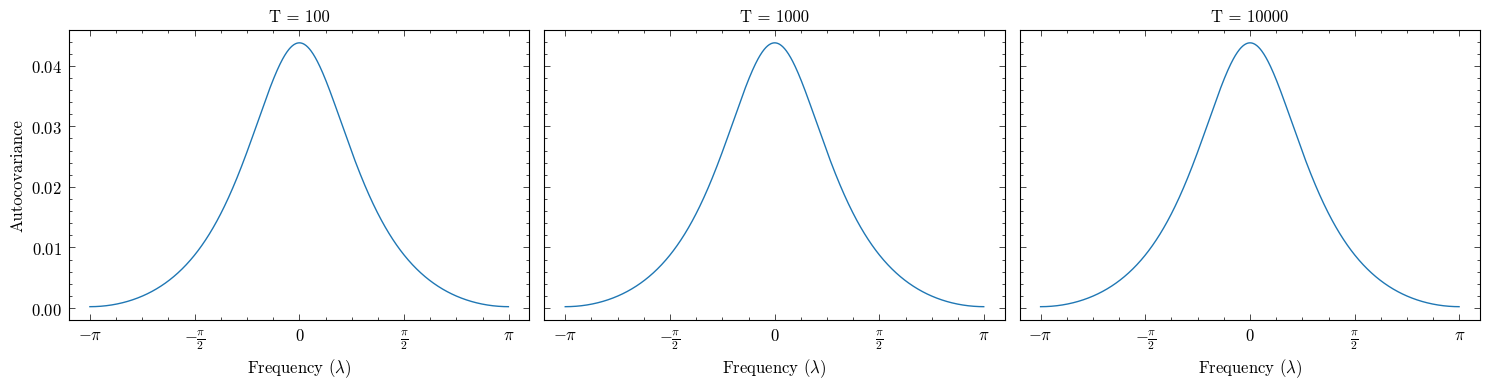

In [11]:
for (p,q) in PARAM:
    plot_spectral_time(p, q, Ts, 1000, SIGMA2, OUTDIR)   


### Question 3

In [12]:
def power_transfer(lambda_vals, p):
    return 1 + p**2 - 2*p*np.cos(lambda_vals)

In [18]:

lambdas = np.linspace(-math.pi, math.pi, 1000, endpoint=False)
pi_values = [1.0, 0.5, -0.5] 

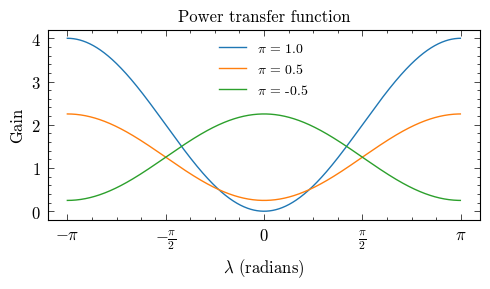

In [33]:
for p in pi_values:
    H = power_transfer(lambdas, p)
    plt.plot(lambdas, H, label=f"$\pi$ = {p}")

plt.title("Power transfer function")

ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$",
               r"$\frac{\pi}{2}$", r"$\pi$"]
plt.xticks(ticks, tick_labels)

plt.xlabel(r"$\lambda$ (radians)")
plt.ylabel("Gain")
plt.legend()
plt.tight_layout()

plt.savefig('../Figures/Assignment02/power_transfer.png', dpi = 300)